<a href="https://colab.research.google.com/github/yutongye616/python-colab/blob/main/EntropyComputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

starting running .....
matrix dimensions:  100 10
matrix dimensions:  200 20
matrix dimensions:  300 30
matrix dimensions:  400 40
matrix dimensions:  500 50
matrix dimensions:  600 60
matrix dimensions:  700 70
matrix dimensions:  800 80
matrix dimensions:  900 90
matrix dimensions:  1000 100
matrix dimensions:  1100 110
matrix dimensions:  1200 120
matrix dimensions:  1300 130
matrix dimensions:  1400 140
result is written to CompareEntropyFig.pdf


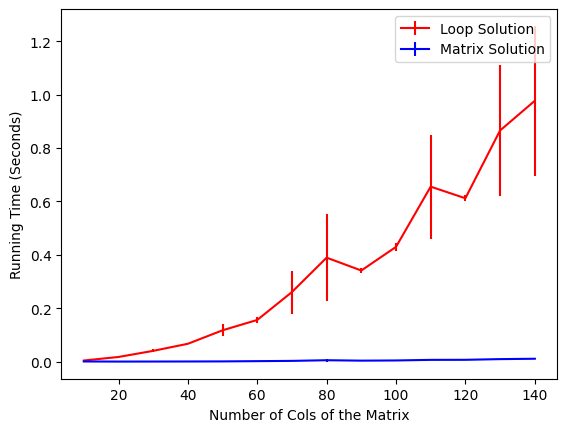

In [ ]:
import numpy as np
import time

def compute_entropy_loop(X):
    N = np.sum(X)       # use np.sum rather than sum, check the difference
    if N == 0:          # if N is zero, quit right way
        return 0
    entropy = 0.0       # initialize entropy
    for i in range(len(X)):
        for j in range(len(X[0])):
            if X[i,j] == 0:     # if zero prob, skip
                continue

            prob = float(X[i,j]) / N    # remember to convert an inter to a float first,
                                        # otherwise the result will be rounded
            logp = np.log2(prob)        # take log base 2
            entropy = entropy - prob * logp

    return entropy


def compute_entropy_cool(X):
    N = np.sum(X)
    if N == 0:
        return 0

    prob = X.astype(float) / N    # probability matrix, conver to float matrix using astype
    tmpM = np.zeros(prob.shape)
    tmpM[X!=0] = prob[X!=0] * np.log2(prob[X!=0])   # select entries for element-wise product
    return - np.sum(tmpM)

print('starting running .....')
np.random.seed(100)
params = range(10,141,10)   # different param setting
nparams = len(params)       # number of different parameters

perf_loop = np.zeros([10,nparams])  # 10 trials = 10 rows, each parameter is a column
perf_cool = np.zeros([10,nparams])

counter = 0

for ncols in params:
    nrows = ncols * 10

    print ("matrix dimensions: ", nrows, ncols)

    for i in range(10):
        X = np.random.randint(0,20,[nrows,ncols])   # random matrix
                                                    # you need to use random.rand(...) for float matrix

        st = time.time()
        entropy_loop = compute_entropy_loop(X)
        et = time.time()
        perf_loop[i,counter] = et - st              # time difference

        st = time.time()
        entropy_cool = compute_entropy_cool(X)
        et = time.time()
        perf_cool[i,counter] = et - st

        assert np.isclose(entropy_loop, entropy_cool, atol=1e-06)

    counter = counter + 1

mean_loop = np.mean(perf_loop, axis = 0)    # mean time for each parameter setting (over 10 trials)
mean_cool = np.mean(perf_cool, axis = 0)

std_loop = np.std(perf_loop, axis = 0)      # standard deviation
std_cool = np.std(perf_cool, axis = 0)

import matplotlib.pyplot as plt
plt.errorbar(params, mean_loop[0:nparams], yerr=std_loop[0:nparams], color='red',label = 'Loop Solution')
plt.errorbar(params, mean_cool[0:nparams], yerr=std_cool[0:nparams], color='blue', label = 'Matrix Solution')
plt.xlabel('Number of Cols of the Matrix')
plt.ylabel('Running Time (Seconds)')
plt.legend()
plt.savefig('CompareEntropyFig.pdf')
# plt.show()    # uncomment this if you want to see it right way

print ("result is written to CompareEntropyFig.pdf")